<a href="https://colab.research.google.com/github/VinayakMehta007/Employee-Salary-Classification-Model/blob/main/Employee_Salary_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 👩‍💻 Employee Salary Prediction Project
# ----------------------------------------------------------------

# ✅ STEP 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import joblib

# 📥 STEP 2: Load Dataset

In [2]:
data = pd.read_csv("/content/adult 3.csv")

# 📊 STEP 3: Basic EDA

In [3]:
print("\nFirst 10 Rows:")
display(data.head(10))

print("\nLast 3 Rows:")
display(data.tail(3))

print("\nShape:", data.shape)
print("\nMissing values:")
display(data.isna().sum())


First 10 Rows:


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K



Last 3 Rows:


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K



Shape: (48842, 15)

Missing values:


,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


# 🧹 STEP 4: Data Cleaning

In [4]:
print(data['workclass'].value_counts())
data['workclass'].replace({'?': 'Others'}, inplace=True)
print(data['workclass'].value_counts())

data['occupation'].replace({'?': 'Others'}, inplace=True)
print(data['occupation'].value_counts())

data = data[~data['workclass'].isin(['Without-pay', 'Never-worked'])]
print(data['workclass'].value_counts())
print(data['relationship'].value_counts())
print(data['gender'].value_counts())
print("\nNew Shape:", data.shape)

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64
workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Others               2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64
occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Others               2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64
workclass
Private             339

/tmp/ipython-input-4-2171853408.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['workclass'].replace({'?': 'Others'}, inplace=True)
/tmp/ipython-input-4-2171853408.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

# 📉 STEP 5: Outlier Detection & Removal

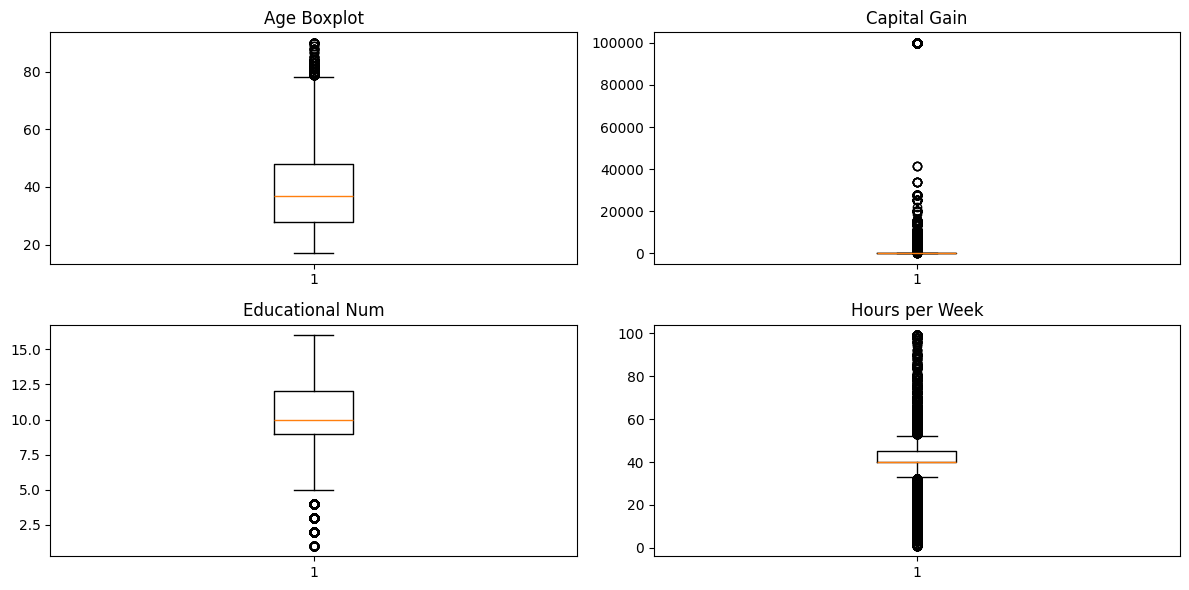


Shape After Cleaning: (46720, 15)


In [5]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
plt.boxplot(data['age'])
plt.title('Age Boxplot')
data = data[(data['age'] >= 17) & (data['age'] <= 75)]

plt.subplot(2,2,2)
plt.boxplot(data['capital-gain'])
plt.title('Capital Gain')

plt.subplot(2,2,3)
plt.boxplot(data['educational-num'])
plt.title('Educational Num')
data = data[(data['educational-num'] >= 5) & (data['educational-num'] <= 16)]

plt.subplot(2,2,4)
plt.boxplot(data['hours-per-week'])
plt.title('Hours per Week')

plt.tight_layout()
plt.show()

print("\nShape After Cleaning:", data.shape)

# 🔄 STEP 6: Feature Encoding

In [6]:
le = LabelEncoder()
for col in ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']:
    data[col] = le.fit_transform(data[col])

# 🧹 Drop redundant column
data.drop(columns=['education'], inplace=True)

# 📦 STEP 7: Define Features and Target

In [7]:
X = data.drop(columns=['income'])
y = data['income']


# 🔀 STEP 8: Train-Test Split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🤖 STEP 9: Train and Compare Models

In [9]:
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RandomForest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "GradientBoosting": GradientBoostingClassifier()
}

results = {}

for name, model in models.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n📌 {name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))


📌 LogisticRegression Accuracy: 0.8149
              precision    recall  f1-score   support

       <=50K       0.84      0.93      0.88      7010
        >50K       0.69      0.46      0.55      2334

    accuracy                           0.81      9344
   macro avg       0.77      0.70      0.72      9344
weighted avg       0.80      0.81      0.80      9344


📌 RandomForest Accuracy: 0.8478
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      7010
        >50K       0.74      0.61      0.67      2334

    accuracy                           0.85      9344
   macro avg       0.81      0.77      0.78      9344
weighted avg       0.84      0.85      0.84      9344


📌 KNN Accuracy: 0.8245
              precision    recall  f1-score   support

       <=50K       0.87      0.90      0.88      7010
        >50K       0.67      0.60      0.63      2334

    accuracy                           0.82      9344
   macro avg       0.77      0.7

# 📈 STEP 10: Visualize Model Comparison

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


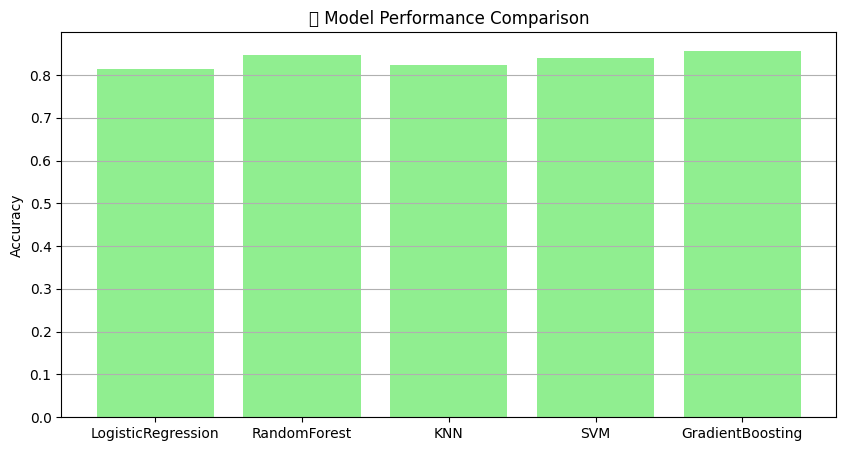

In [10]:
plt.figure(figsize=(10,5))
plt.bar(results.keys(), results.values(), color='lightgreen')
plt.ylabel("Accuracy")
plt.title("🔍 Model Performance Comparison")
plt.grid(True, axis='y')
plt.show()


# 💾 STEP 11: Save the Best Model

In [11]:
best_model_name = max(results, key=results.get)
best_model = models[best_model_name].fit(X_train, y_train)
joblib.dump(best_model, "best_model.pkl")
print(f"\n✅ Best model: {best_model_name} saved as 'best_model.pkl'")


✅ Best model: GradientBoosting saved as 'best_model.pkl'


# 💻 STEP 12: Run Streamlit App

In [12]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 82.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 95.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.2 MB/s eta 0:00:00


In [13]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib
import numpy as np

# Load trained model
model = joblib.load("best_model.pkl")

# Categorical encoders (based on LabelEncoder fitting order during training)
workclass_map = {'Private': 3, 'Self-emp-not-inc': 5, 'Self-emp-inc': 4,
                 'Federal-gov': 0, 'Local-gov': 1, 'State-gov': 6,
                 'Without-pay': 7, 'Never-worked': 2, 'Others': 8}

marital_status_map = {'Married-civ-spouse': 2, 'Divorced': 0,
                      'Never-married': 3, 'Separated': 4,
                      'Widowed': 5, 'Married-spouse-absent': 1}

occupation_map = {'Tech-support': 12, 'Craft-repair': 1, 'Other-service': 9,
                  'Sales': 10, 'Exec-managerial': 2, 'Prof-specialty': 8,
                  'Handlers-cleaners': 5, 'Machine-op-inspct': 6,
                  'Adm-clerical': 0, 'Farming-fishing': 3,
                  'Transport-moving': 13, 'Priv-house-serv': 11,
                  'Protective-serv': 7, 'Armed-Forces': 4, 'Others': 14}

relationship_map = {'Wife': 5, 'Own-child': 1, 'Husband': 0,
                    'Not-in-family': 3, 'Other-relative': 2, 'Unmarried': 4}

race_map = {'White': 4, 'Black': 0, 'Asian-Pac-Islander': 1,
            'Amer-Indian-Eskimo': 2, 'Other': 3}

gender_map = {'Male': 1, 'Female': 0}

native_country_map = {
    'United-States': 38, 'Mexico': 24, 'Philippines': 29, 'Germany': 10,
    'Canada': 4, 'India': 15, 'England': 8, 'China': 6, 'Cuba': 9,
    'South': 35, 'Iran': 16, 'Italy': 17, 'Poland': 27, 'Jamaica': 18,
    'Others': 41
}

# Create inverse mapping for decoding
inverse_native_country_map = {v: k for k, v in native_country_map.items()}


# Set up Streamlit UI
st.set_page_config(page_title="💼 Employee Salary Predictor", page_icon="💸", layout="centered")

# Page title
st.markdown("<h1 style='color:#4CAF50;'>💸 Employee Salary Classification App</h1>", unsafe_allow_html=True)
st.markdown("<p style='color:#666666;'>Predict if an employee earns more than $50K per year based on various attributes.</p>", unsafe_allow_html=True)
st.divider()

# Input from user
st.sidebar.header("🧾 Input Employee Details")

age = st.sidebar.slider("🎂 Age", 18, 75, 30)
workclass = st.sidebar.selectbox("🏢 Workclass", list(workclass_map.keys()))
fnlwgt = 200000  # default - fnlwgt was not used in the model training based on variable X
educational_num = st.sidebar.slider("📚 Education Number", 1, 16, 10)
marital_status = st.sidebar.selectbox("❤️ Marital Status", list(marital_status_map.keys()))
occupation = st.sidebar.selectbox("💼 Occupation", list(occupation_map.keys()))
relationship = st.sidebar.selectbox("👨‍👩‍👧 Relationship", list(relationship_map.keys()))
race = st.sidebar.selectbox("🧑 Race", list(race_map.keys()))
gender = st.sidebar.selectbox("⚧ Gender", list(gender_map.keys()))
capital_gain = st.sidebar.slider("📈 Capital Gain", 0, 99999, 0)
capital_loss = st.sidebar.slider("📉 Capital Loss", 0, 4356, 0)
hours_per_week = st.sidebar.slider("⏱ Hours per Week", 1, 99, 40)
native_country = st.sidebar.selectbox("🌍 Native Country", list(native_country_map.keys()))

# Create feature input for prediction
input_data = {
    'age': [age],
    'workclass': [workclass_map.get(workclass, 8)],
    'fnlwgt': [fnlwgt], # fnlwgt was not used in the model training based on variable X
    'educational-num': [educational_num],
    'marital-status': [marital_status_map.get(marital_status, 3)],
    'occupation': [occupation_map.get(occupation, 14)],
    'relationship': [relationship_map.get(relationship, 3)],
    'race': [race_map.get(race, 4)],
    'gender': [gender_map.get(gender, 1)],
    'capital-gain': [capital_gain],
    'capital-loss': [capital_loss],
    'hours-per-week': [hours_per_week],
    'native-country': [native_country_map.get(native_country, 41)]
}
input_df = pd.DataFrame(input_data)

# Ensure columns are in the same order as training data (excluding 'income')
# The training data columns can be inferred from X_train or X_test variables
training_columns = ['age', 'workclass', 'fnlwgt', 'educational-num', 'marital-status',
                    'occupation', 'relationship', 'race', 'gender', 'capital-gain',
                    'capital-loss', 'hours-per-week', 'native-country']
input_df = input_df[training_columns]


# Decode 'native-country' for single prediction display
input_df_display = input_df.copy()
input_df_display['native-country'] = input_df_display['native-country'].map(inverse_native_country_map).fillna('Unknown')


st.write("### 🔍 Input Data Preview")
st.write(input_df_display)


# Predict
if st.button("🔮 Predict Salary Class"):
    # Scale numerical features before prediction if the scaler was saved separately
    # If the scaler is part of the pipeline saved in best_model.pkl, this step is not needed here
    # if 'scaler' in pipe.named_steps: # Assuming the pipeline is available
    #    predict_input_scaled = pipe.named_steps['scaler'].transform(input_df)
    # else:
    #    predict_input_scaled = input_df # Or apply separately loaded scaler

    # Use the encoded input_df for prediction
    prediction = model.predict(input_df)[0]
    proba = model.predict_proba(input_df)[0]


    # Display results
    result = ">50K" if prediction == 1 else "<=50K"
    st.success(f"✅ Prediction: Income is {result}")
    st.info(f"📊 Confidence: {proba[1]*100:.2f}% for >50K")


# Batch prediction section
st.subheader("📊 Batch Prediction (CSV Upload)")

uploaded_file = st.file_uploader("Upload a CSV file with employee data", type=["csv"])
if uploaded_file is not None:
    df = pd.read_csv(uploaded_file)

    # Encode categorical features in the uploaded data
    for col in ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']:
         if col in df.columns:
            if col == 'native-country':
                 # Handle potential '?' in uploaded data before mapping
                 df[col] = df[col].replace('?', 'Others')
                 df[col] = df[col].map(native_country_map).fillna(41) # Use fillna for potential new categories
            elif col == 'workclass':
                 df[col] = df[col].replace('?', 'Others')
                 df[col] = df[col].map(workclass_map).fillna(8)
            elif col == 'occupation':
                 df[col] = df[col].replace('?', 'Others')
                 df[col] = df[col].map(occupation_map).fillna(14)
            elif col == 'marital-status':
                 df[col] = df[col].map(marital_status_map).fillna(3)
            elif col == 'relationship':
                 df[col] = df[col].map(relationship_map).fillna(3)
            elif col == 'race':
                 df[col] = df[col].map(race_map).fillna(4)
            elif col == 'gender':
                 df[col] = df[col].map(gender_map).fillna(1)

    # Ensure columns are in the same order as training data (excluding 'income')
    # If 'income' is present in the uploaded data, drop it before reordering
    if 'income' in df.columns:
        df = df.drop(columns=['income'])

    # Reorder columns to match training data
    df = df[training_columns]

    st.write("Preview of Uploaded Data (Encoded for Prediction):")
    st.dataframe(df)

    try:
        # Scale numerical features before prediction if the scaler was saved separately
        # If the scaler is part of the pipeline saved in best_model.pkl, this step is not needed here
        # if 'scaler' in pipe.named_steps: # Assuming the pipeline is available
        #    df_scaled = pipe.named_steps['scaler'].transform(df)
        # else:
        #    df_scaled = df # Or apply separately loaded scaler


        predictions = model.predict(df)
        df['Salary Category'] = np.where(predictions == 1, '>50K', '<=50K')

        # Decode 'native-country' back to original names for display
        if 'native-country' in df.columns:
             df['native-country'] = df['native-country'].map(inverse_native_country_map).fillna('Unknown')


        st.success("✅ Predictions completed successfully!")
        st.dataframe(df)
        csv = df.to_csv(index=False).encode('utf-8')
        st.download_button("⬇️ Download Predictions", csv, "predictions.csv", "text/csv")
    except Exception as e:
        st.error(f"⚠️ Error during prediction: {e}. Make sure your CSV has the correct columns and data types.")

Writing app.py


In [14]:
# Install necessary packages
!pip install streamlit pyngrok --quiet

# Authenticate ngrok
!ngrok config add-authtoken 30982Tx35DD7h8ZR4eDq0S9DEmF_2n1cL6RHkc4hicXAEDTP7

# Streamlit launch setup
import os
import threading
import time
from pyngrok import ngrok

# Kill any running ngrok processes
!kill $(pgrep ngrok) || true

# Function to run Streamlit app
def run_streamlit():
    os.system('streamlit run app.py --server.port 8501')

# Start the streamlit app in a separate thread
thread = threading.Thread(target=run_streamlit)
thread.start()

# Wait a few seconds to ensure the server has started
time.sleep(5)

# Create a public URL
public_url = ngrok.connect(8501)
print("🚀 Your Streamlit app is live here:", public_url)

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
kill: usage: kill [-s sigspec | -n signum | -sigspec] pid | jobspec ... or kill -l [sigspec]
🚀 Your Streamlit app is live here: NgrokTunnel: "https://cc86c83b44d9.ngrok-free.app" -> "http://localhost:8501"
